# Implementing a Custom Image Dataset

---

This notebook provides a practical implementation of the core **data pipeline** concepts introduced in **Chapter 12**, focusing on how to handle a custom dataset, such as the large-scale **Cats vs. Dogs** image classification task.

It demonstrates the two fundamental classes required for efficient data loading in PyTorch: `Dataset` and `DataLoader`.

### Key Topics and Implementations:

* **Creating Synthetic Data:** The notebook starts by generating simple random Tensors (`t_x`, `t_y`) to simulate input features and target labels, serving as a placeholder for the actual Cats vs. Dogs images.
* **Implementing a Custom `Dataset`:**
    * It defines the **`JointDataset`** class, which inherits from `torch.utils.data.Dataset`.
    * This class implements the required methods:
        * `__len__`: Returns the total number of samples in the dataset.
        * `__getitem__`: Retrieves a single feature-label pair (`x`, `y`) by index, mimicking the way data would be accessed from disk in a real image classification project.
* **Initializing the `DataLoader`:** The custom `JointDataset` is then wrapped by the **`torch.utils.data.DataLoader`** class, which manages:
    * **Batching:** Grouping individual samples into mini-batches for GPU processing.
    * **Iteration:** Providing an efficient way to loop through the data during the training phase.
* **Image Handling Practice:** The visualization section confirms the process by printing the shape of the data samples (notably, mentioning 'Image shape'), demonstrating that the pipeline is correctly set up to handle multi-dimensional image tensors for a task like Cats vs. Dogs classification.

This notebook is a crucial step in preparing the data structure before building and training the **Convolutional Neural Network (CNN)**, which is the focus of later chapters.

In [1]:
import torch
import numpy as np

In [2]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype= torch.float32)
t_y = torch.rand(4, dtype= torch.float32)

In [3]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return(self.x[idx], self.y[idx])

In [4]:
joint_dataset = JointDataset(t_x, t_y)
for item in joint_dataset:
    print(' x :', item[0], ' y : ', item[1])

 x : tensor([0.7576, 0.2793, 0.4031])  y :  tensor(0.6826)
 x : tensor([0.7347, 0.0293, 0.7999])  y :  tensor(0.3051)
 x : tensor([0.3971, 0.7544, 0.5695])  y :  tensor(0.4635)
 x : tensor([0.4388, 0.6387, 0.5247])  y :  tensor(0.4550)


In [5]:
data_loader = DataLoader(dataset= joint_dataset, batch_size= 2, shuffle= True)

In [6]:
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}', f'x : {batch[0]}',
          '\n         ', f'y : {batch[1]}')

batch 1 x : tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
          y : tensor([0.3051, 0.4550])
batch 2 x : tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
          y : tensor([0.4635, 0.6826])


In [7]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}', f'x : {batch[0]}',
          '\n         ', f'y : {batch[1]}')

epoch 1
batch 1 x : tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
          y : tensor([0.4550, 0.4635])
batch 2 x : tensor([[0.7347, 0.0293, 0.7999],
        [0.7576, 0.2793, 0.4031]]) 
          y : tensor([0.3051, 0.6826])
epoch 2
batch 1 x : tensor([[0.4388, 0.6387, 0.5247],
        [0.7347, 0.0293, 0.7999]]) 
          y : tensor([0.4550, 0.3051])
batch 2 x : tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
          y : tensor([0.6826, 0.4635])


In [8]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(file) for file in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


shape of 1 image : (900, 1200, 3)
shape of 2 image : (900, 1200, 3)
shape of 3 image : (900, 742, 3)
shape of 4 image : (800, 1200, 3)
shape of 5 image : (800, 1200, 3)
shape of 6 image : (900, 1200, 3)


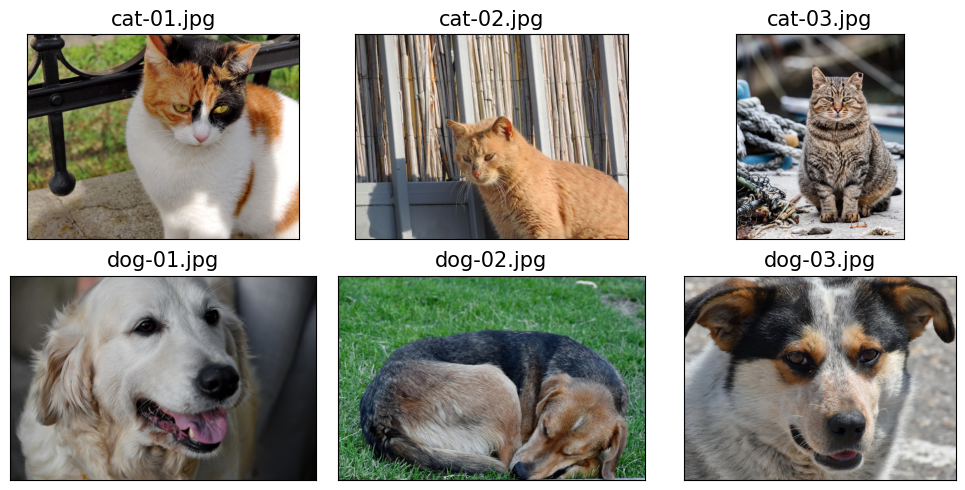

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize= (10, 5))
for i, file in enumerate(file_list, 1):
    img = Image.open(file)
    print(f'shape of {i} image : {np.array(img).shape}')
    ax = fig.add_subplot(2, 3, i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size= 15)
plt.tight_layout()
plt.show()

In [22]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

In [24]:
class ImageDataset(Dataset):
    def __init__(self, filenames, labels):
        self.filenames = filenames
        self.labels = labels
    def __len__(self):
        return len(self.filenames)
    def __getitem__(self, index):
        return(self.filenames[index], self.labels[index])

In [26]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [27]:
import torchvision.transforms as transforms
img_height, img_weight = 120, 80

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_weight))
])

In [29]:
class ImageDataset(Dataset):
    def __init__(self, filenames, labels, transform= None):
        self.filenames = filenames
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        img = Image.open(self.filenames[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

In [30]:
image_dataset = ImageDataset(file_list, labels, transform= transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image 1 shape: (3, 120, 80)
Image 2 shape: (3, 120, 80)
Image 3 shape: (3, 120, 80)
Image 4 shape: (3, 120, 80)
Image 5 shape: (3, 120, 80)
Image 6 shape: (3, 120, 80)


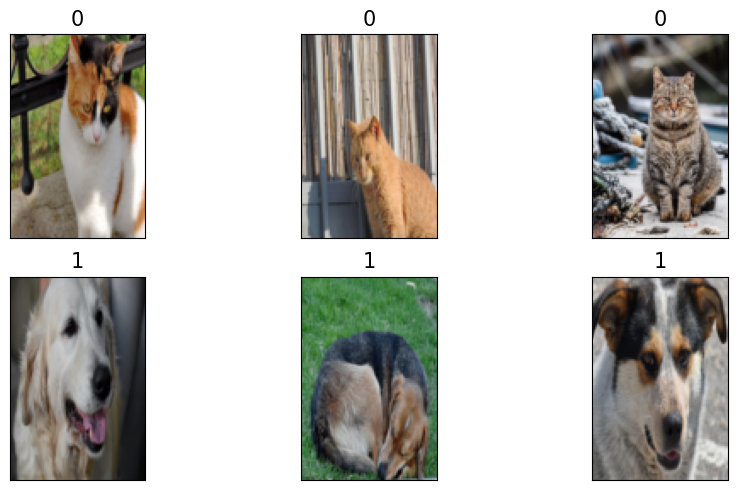

In [43]:
fig = plt.figure(figsize= (10, 5))
for i, image in enumerate(image_dataset, 1):
    print(f'Image {i} shape: {image[0].numpy().shape}')
    ax = fig.add_subplot(2, 3, i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[0].numpy().transpose(1, 2, 0))
    ax.set_title(f'{image[1]}', size= 15)
plt.tight_layout()
plt.show()